## Лінійна регресія

Імпортуємо необхідні бібліотеки

In [1]:
# Імпортуємо бібліотеку для реалізації операцій лінійної алгебри.
import numpy as np
# Імпортуємо бібліотеку для побудови графіків
import matplotlib.pyplot as plt
# Імпортуємо бібліотеку машинного навчання scikit-learn [scikit-learn.org],
# конкретно імпортуємо модуль, що мість набори даних для навчання моделей.
from sklearn import datasets
%matplotlib inline

In [64]:
np.random.seed(512)

In [65]:
# Завантажуємо набір даних бостонських домів.
loaded_data = datasets.load_boston()

In [66]:
# Розділяємо завантажені дані на X та y.
X = loaded_data.data
y = loaded_data.target

In [67]:
m = X.shape[0]
n = X.shape[1]
print('Кількість прикладів та кількість ознак в даних')
print('m =', m, ',', 'n =', n)

Кількість прикладів та кількість ознак в даних
m = 506 , n = 13


In [68]:
print('Розмірність X:', X.shape)
print('Розмірність y:', y.shape)

Розмірність X: (506, 13)
Розмірність y: (506,)


In [69]:
# Додаємо нульовий стовпець з одиниць до матриці X. 
ones_vector = np.ones((m, 1))
X = np.concatenate((ones_vector, X), axis=1)

In [70]:
# Розмірність X змінилась.
X.shape

(506, 14)

In [71]:
# Генеруємо параметри моделі, як випадкові невеликі числа.
Theta = np.random.randn(n+1, )
print(Theta)

[-0.19178686 -0.26145488 -1.57389213 -1.30885791 -0.25001072 -0.60218954
  2.53408158 -1.28263793  0.83974197 -0.7100226   0.80867675  0.23725623
 -0.65083358  1.91191026]


In [56]:
# Функція, що визначає середню абсолютно (по модулю) помилку моделі на даних.
def compute_error(Theta, X, y):
    mean_error = 1/m*sum(abs(np.dot(X, Theta) - y))
    print(mean_error)

In [57]:
# Визначимо сердню абсолютну помилку поточної моделі (з випадковими параметрами) на навчальному наборі даних.
compute_error(Theta, X, y)

521.5978247613826


In [58]:
# Функція, що визначає функціонал якості моделі.
def compute_cost(Theta):
    J = 1/(2*m) * np.dot((np.dot(X, Theta) - y).T, (np.dot(X, Theta) - y))
    return J

In [59]:
# Функція, що визначає градієнт функціонала якості.
def compute_grad(Theta):
    grad_J = 1/m * np.dot(X.T, (np.dot(X, Theta) - y))
    return grad_J

In [60]:
# Швидкість навчання моделі (learning rate).
alpha = 0.000003

In [61]:
# Навчання моделі.
costs = []
for _ in range(100000):
    grad_J = compute_grad(Theta)
    Theta = Theta - alpha*grad_J
    J = compute_cost(Theta)
    costs.append(J)

Text(0.5, 0, 'n_iter (номер ітерації)')

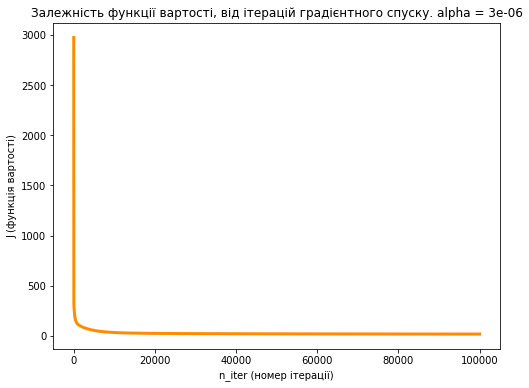

In [62]:
plt.figure(figsize=(8, 6))
plt.plot(costs, color='darkorange', lw=3)
plt.title('Залежність функції вартості, від ітерацій градієнтного спуску. alpha = ' + str(alpha))
plt.ylabel('J (функція вартості)')
plt.xlabel('n_iter (номер ітерації)')

In [63]:
# Визначимо середню помилку моделі на даних після навчання моделі.
compute_error(Theta, X, y)

4.673240752140466


Насправді, у бібліотеці scikit-learn міститься функція, що визначає середню помилку на даних. Вона має назву mean_absolute_error. Можна переконатись, що реалізована вами функція compute_error співпадає з mean_absolute_error.

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y, np.dot(X, Theta))